<a href="https://colab.research.google.com/github/andrewshiva/Training-a-bag-of-words-classifier/blob/master/Training_a_bag_of_words_classifier_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nltk.download('treebank')
nltk.download('universal_tagset')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [0]:
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [0]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [0]:

tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [0]:
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

In [0]:

X,y = ext_ft(tagged_sentences)
n_sample = 20000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:


def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [15]:
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'ADJ')
('POS', 'NOUN')
('tagger', 'NOUN')


In [16]:
predictions = rf.predict(X_test)
accuracy_score(y_test,predictions)

0.93875

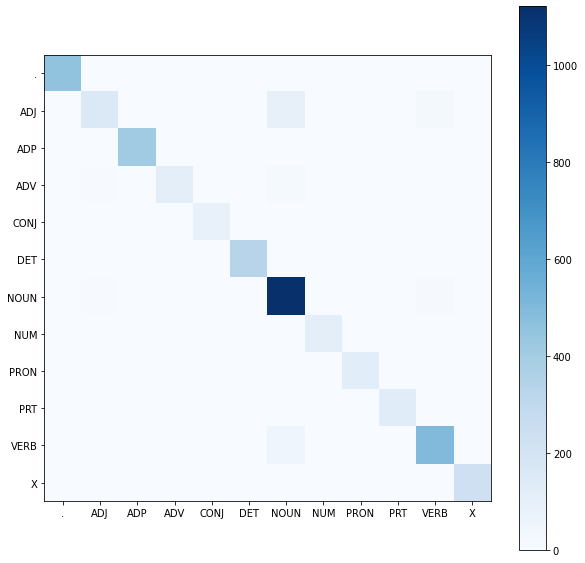

In [17]:
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [18]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('prefix1=*', 0.015673449130299336), ('dist_from_last', 0.014700771700005633), ('suffix2=he', 0.014324404714303678), ('capitalized', 0.01424536600695331), ('suffix2=,', 0.011706248135464939), ('suffix2=ed', 0.010803537737873722), ('suffix3=the', 0.010315603953479968), ('dist_from_first', 0.01006334828394386), ('prefix2=,', 0.00942986335796657), ('suffix1=d', 0.00912851436161729), ('prefix1=,', 0.008159331521350115), ('prefix2=th', 0.0075087062900253765), ('prefix3=the', 0.00746504485327289), ('word=the', 0.007368615916565803), ('suffix3=.', 0.00701819014033792), ('suffix3=,', 0.006913190529033533), ('prefix1=t', 0.006772844668264541), ('suffix1=s', 0.006561047151663154), ('suffix1=,', 0.006400468919372318), ('word=,', 0.006326315671056836)]
